# pi, pj and pij dynamics
I want to see how the dynamics of pi, pj behave with different training times and tau_z constant.
Also, it is probably obvious but it should be good to double check whether tau_p does not affect the ratio between them

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=3)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history, get_weights
from connectivity_functions import artificial_connectivity_matrix

## An example

epochs 0
epochs 1


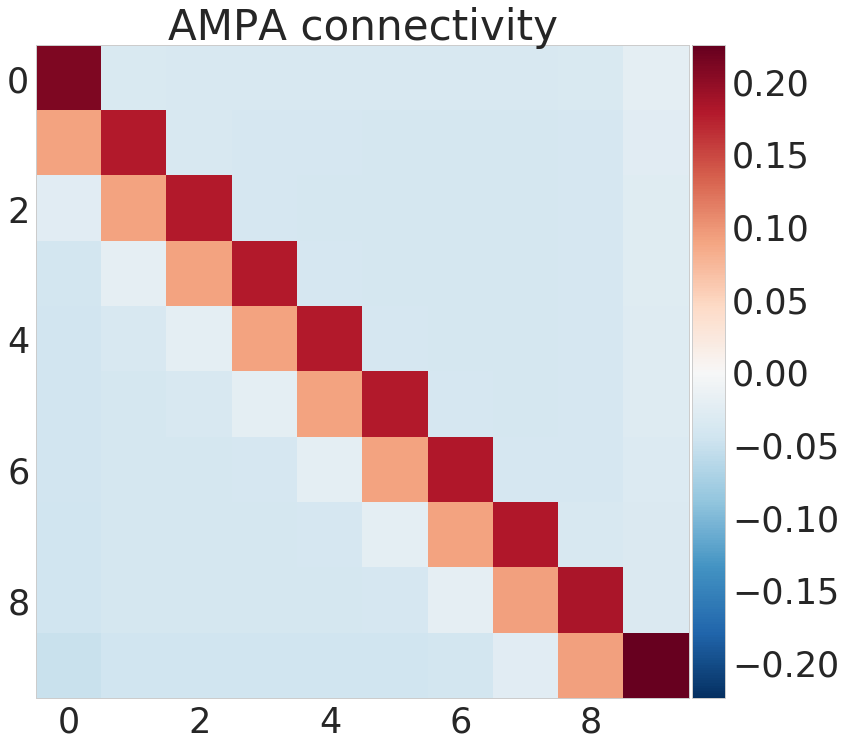

In [2]:
always_learning = False
k_perfect = True
perfect = False
strict_maximum = False

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_z_pre_ampa = 0.050
tau_z_post_ampa = 0.005
tau_p = 50.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre_ampa', 'p_pre_ampa', 'p_post_ampa', 'p_co_ampa']
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval * 2
epochs = 2

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                  always_learning=always_learning)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
training_time = np.linspace(0.100, 1.0, num=n_patterns)[::-1]
# training_time = np.random.normal(loc=0.100, scale=0.010, size=n_patterns)
training_time = 0.100
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

plot_weight_matrix(manager.nn, ampa=True)

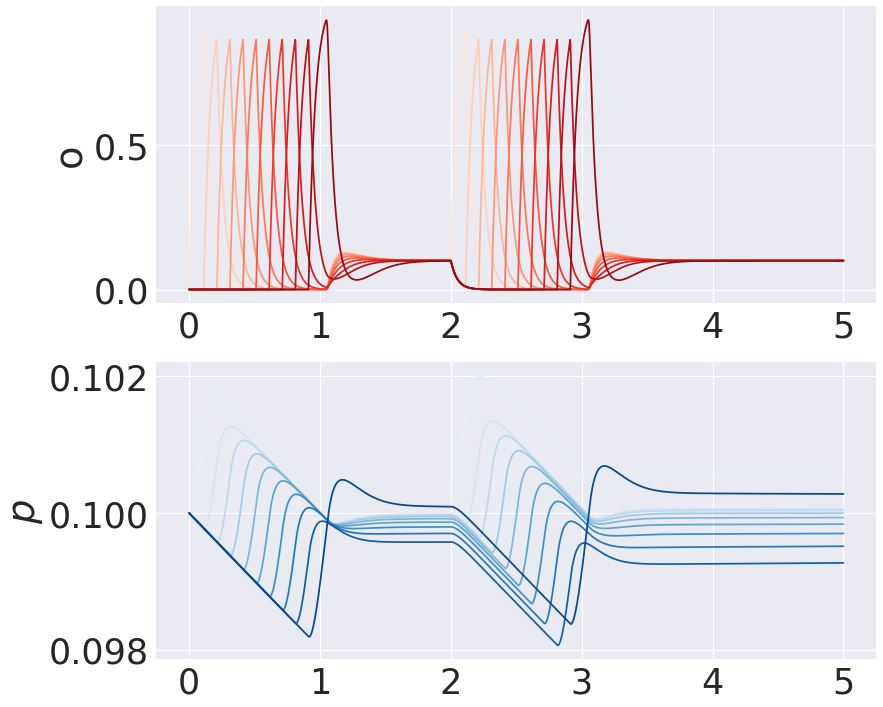

In [3]:
current_palette = sns.color_palette("husl", n_patterns)
current_palette = sns.color_palette("Blues", n_patterns)
current_palette2 = sns.color_palette("Reds", n_patterns)
o = manager.history['o']
z = manager.history['z_pre_ampa']
pi = manager.history['p_pre_ampa']
pj = manager.history['p_post_ampa']
time = np.linspace(0, manager.T_total, num=pi.shape[0])

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for index in range(n_patterns):

    ax1.plot(time, z[:, index], color=current_palette2[index], label=str(index))
    
    ax2.plot(time, pi[:, index], color=current_palette[index])
    # ax2.plot(time, pj[:, index], color=current_palette2[index])
    
ax1.set_ylabel('o')
ax2.set_ylabel(r'$p$');

In [4]:
print(nn.p_pre_ampa)
print(nn.p_post_ampa)
print(nn.p_co_ampa)

[ 0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.099  0.1  ]
[ 0.101  0.1    0.1    0.1    0.1    0.1    0.1    0.1    0.099  0.1  ]
[[ 0.012  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01 ]
 [ 0.011  0.012  0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01 ]
 [ 0.01   0.011  0.012  0.01   0.01   0.01   0.01   0.01   0.01   0.01 ]
 [ 0.01   0.01   0.011  0.012  0.01   0.01   0.01   0.01   0.01   0.01 ]
 [ 0.01   0.01   0.01   0.011  0.012  0.01   0.01   0.01   0.01   0.01 ]
 [ 0.01   0.01   0.01   0.01   0.011  0.012  0.01   0.01   0.01   0.01 ]
 [ 0.01   0.01   0.01   0.01   0.01   0.011  0.012  0.01   0.01   0.01 ]
 [ 0.01   0.01   0.01   0.01   0.01   0.01   0.011  0.012  0.01   0.01 ]
 [ 0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.011  0.012  0.01 ]
 [ 0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.01   0.011  0.013]]


## Self

#### Tau_z_variation

In [5]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 2
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

tau_z_pre_vector = np.linspace(0.005, 0.250, num=20)

for tau_z_pre_ in tau_z_pre_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_, tau_z_post_ampa=tau_z_pre_, tau_p=tau_p, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 15.5 s, sys: 8 ms, total: 15.5 s
Wall time: 15.5 s


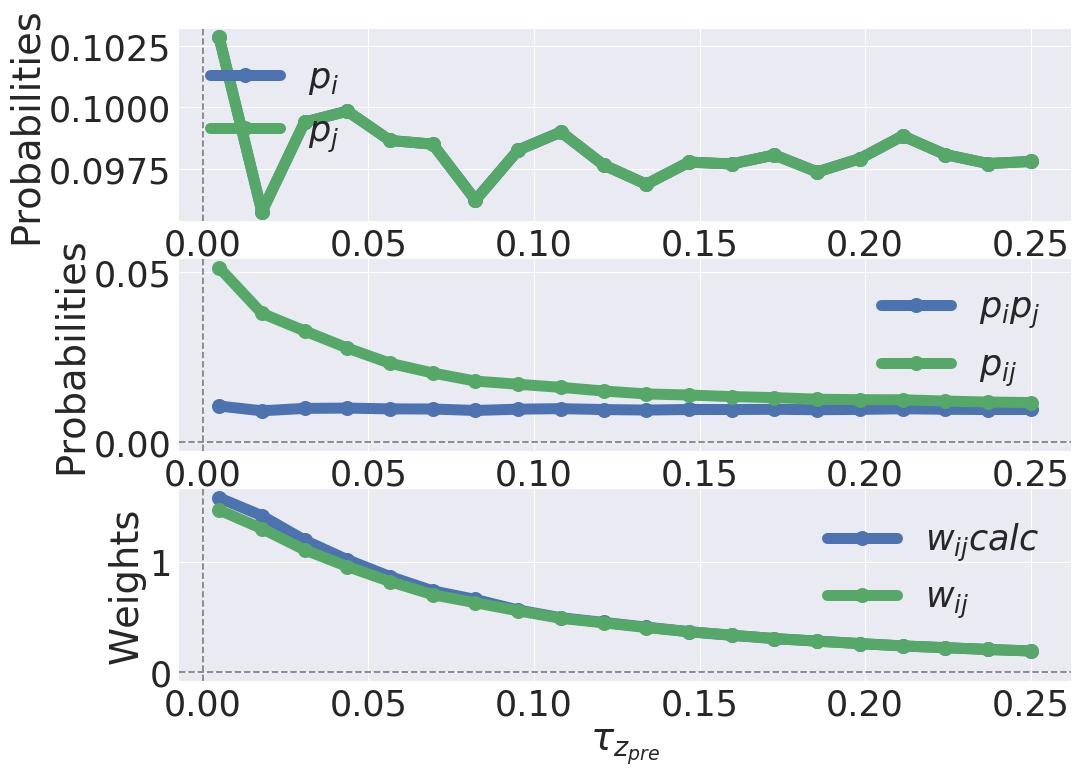

In [6]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(tau_z_pre_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(tau_z_pre_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(tau_z_pre_vector, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(tau_z_pre_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(tau_z_pre_vector, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij} calc$')
ax3.plot(tau_z_pre_vector, w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')

ax3.set_xlabel(r'$\tau_{z_{pre}}$')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

#### Training time variations

In [8]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 2
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

training_times = np.arange(0.050, 2.050, 0.150)
# training_times = np.linspace(0.010, 1.0, num=10)
# training_times = np.linspace(0.010, 1.0, num=10)

for training_time in training_times:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 1min 12s, sys: 156 ms, total: 1min 12s
Wall time: 1min 12s


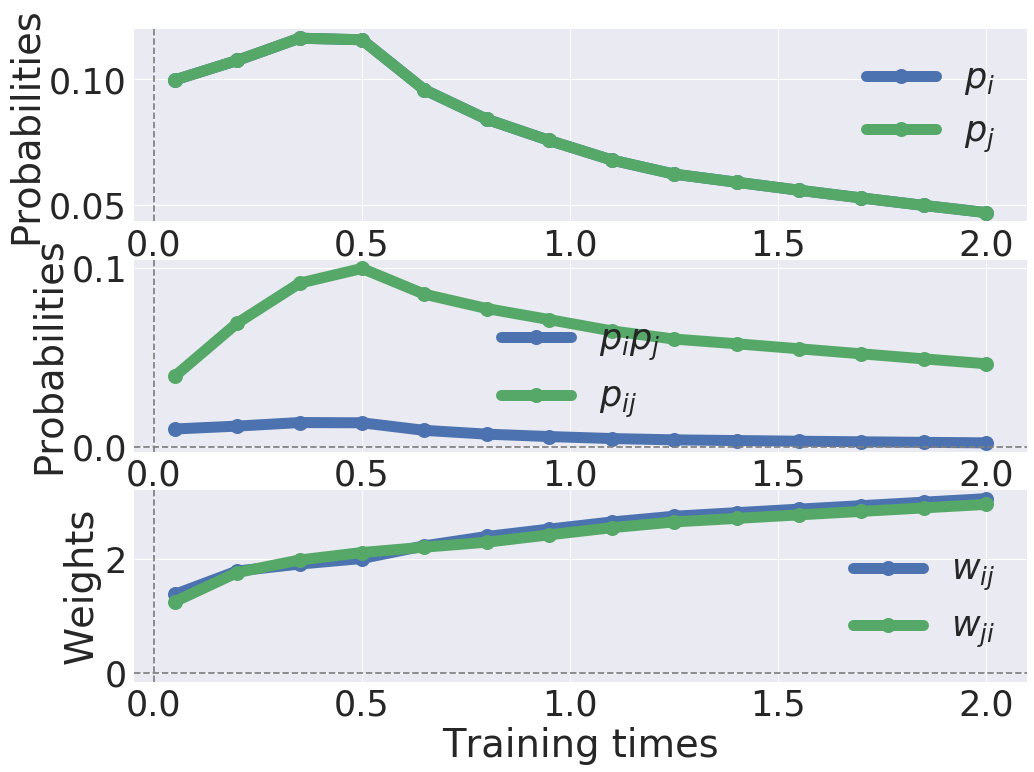

In [9]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(training_times, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(training_times, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
division = pij_vector / np.array(multipy)
ax2.plot(training_times, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(training_times, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
# ax2.plot(training_times, division, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(training_times, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(training_times, w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'Training times')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

In [28]:
pprint.pprint(np.array(pij_vector))
pprint.pprint(np.array(multipy))
pprint.pprint(pij_vector / np.array(multipy))



array([ 0.013,  0.017,  0.021,  0.025,  0.029,  0.031,  0.034,  0.036,
        0.039,  0.042,  0.044,  0.047,  0.049,  0.05 ,  0.052,  0.054,
        0.056,  0.058,  0.059,  0.061])
array([ 0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,
        0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,  0.01 ,
        0.01 ,  0.01 ,  0.01 ,  0.009])
array([ 1.293,  1.719,  2.101,  2.471,  2.809,  3.1  ,  3.388,  3.682,
        3.963,  4.228,  4.485,  4.729,  4.963,  5.188,  5.411,  5.62 ,
        5.823,  6.019,  6.208,  6.392])


#### Tau_p variations

In [10]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 2
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

tau_p_vector = np.linspace(1.0, 30, num=15)

for tau_p_ in tau_p_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p_, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 8.88 s, sys: 0 ns, total: 8.88 s
Wall time: 8.88 s


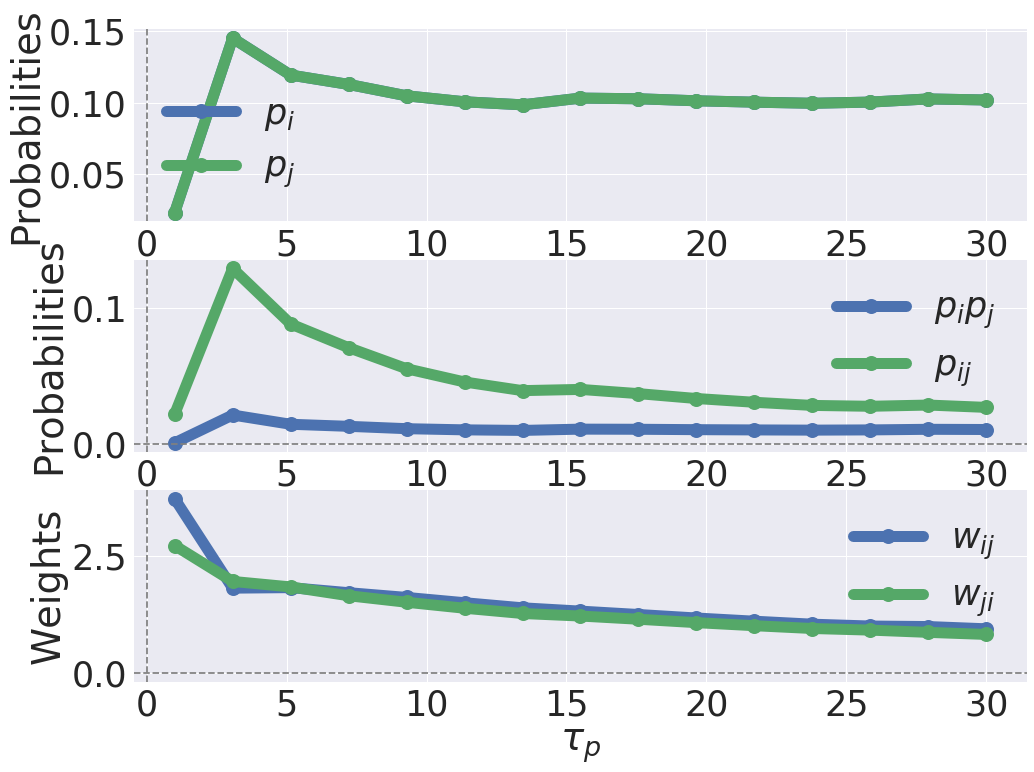

In [11]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(tau_p_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(tau_p_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(tau_p_vector, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(tau_p_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(tau_p_vector, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(tau_p_vector,  w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'$\tau_p$')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

## Next

#### Tau_z variation

In [12]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 3
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

tau_z_pre_vector = np.linspace(0.005, 0.250, num=20)

for tau_z_pre_ in tau_z_pre_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_, tau_z_post_ampa=tau_z_pre_, tau_p=tau_p, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 11.9 s, sys: 32 ms, total: 12 s
Wall time: 12 s


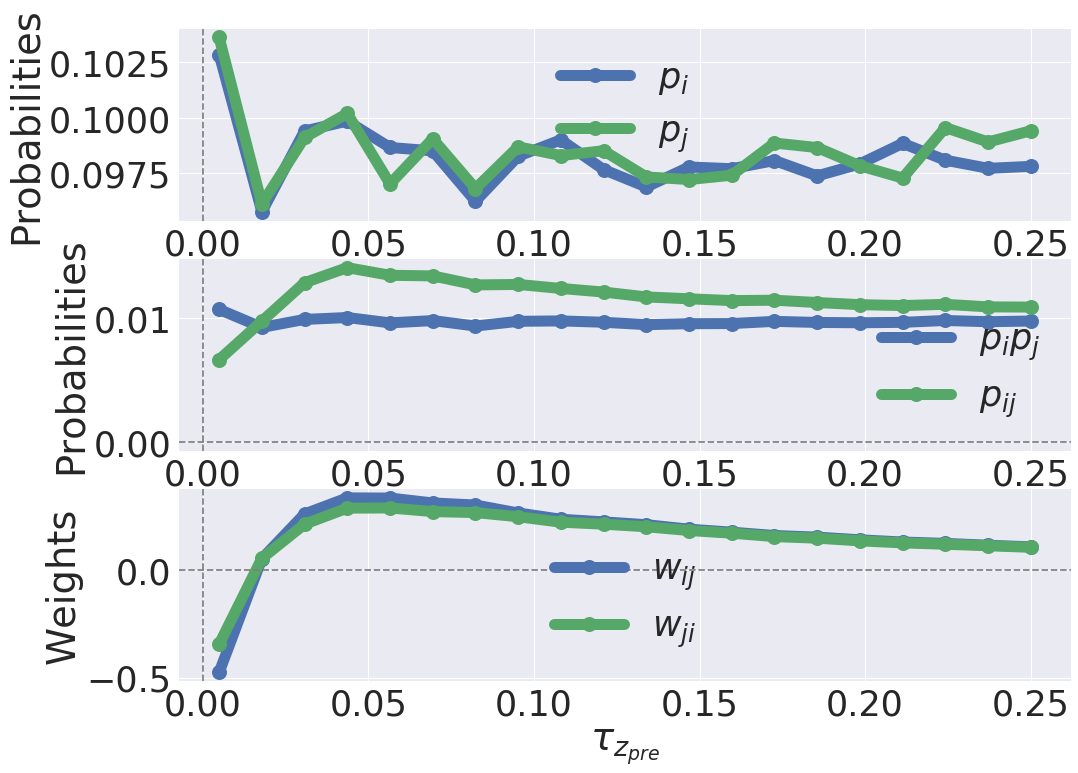

In [13]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(tau_z_pre_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(tau_z_pre_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(tau_z_pre_vector, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(tau_z_pre_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(tau_z_pre_vector, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(tau_z_pre_vector, w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'$\tau_{z_{pre}}$')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

In [14]:
pi_vector[0] * n_patterns

1.0283558194211002

#### Traning time variations

In [15]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 3
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

training_times = np.arange(0.050, 3.050, 0.150)
# training_times = np.linspace(0.010, 1.0, num=10)
# training_times = np.linspace(0.010, 1.0, num=10)

for training_time in training_times:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 1min 52s, sys: 380 ms, total: 1min 52s
Wall time: 1min 51s


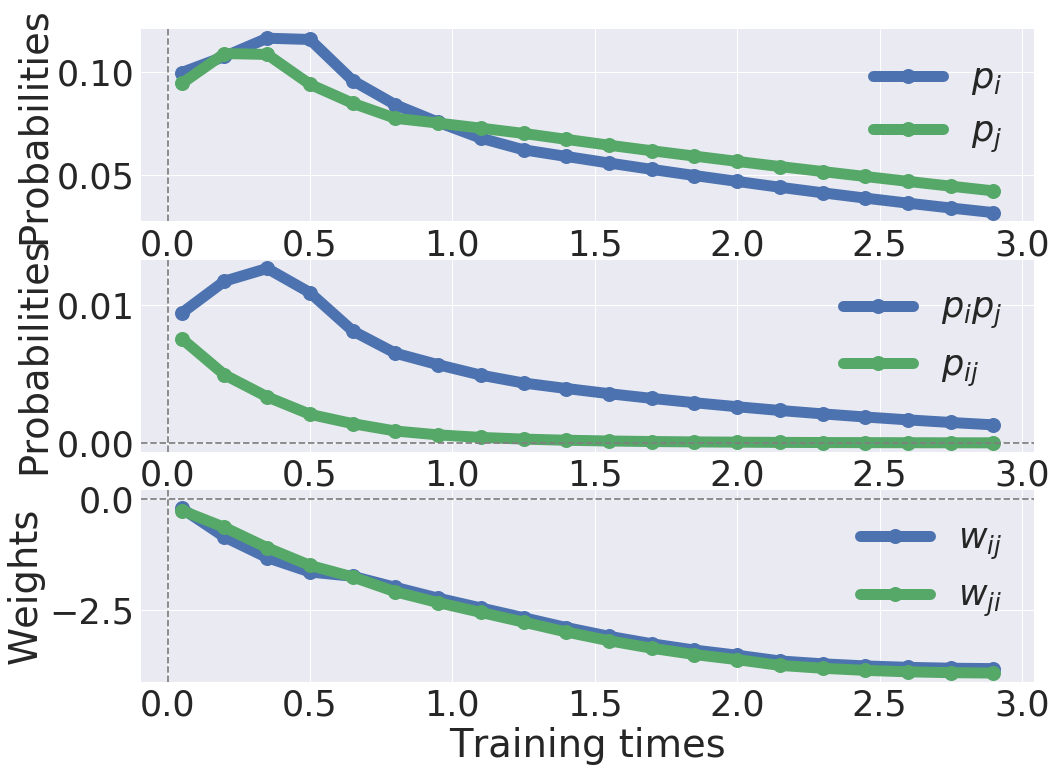

In [16]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(training_times, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(training_times, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(training_times, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(training_times, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(training_times, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(training_times, w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'Training times')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

In [17]:
pi_vector[0] * n_patterns

0.99761795775620943

## Tau_p 

In [18]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 3
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

tau_p_vector = np.linspace(1.0, 30, num=15)

for tau_p_ in tau_p_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p_, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 9 s, sys: 52 ms, total: 9.05 s
Wall time: 9.03 s


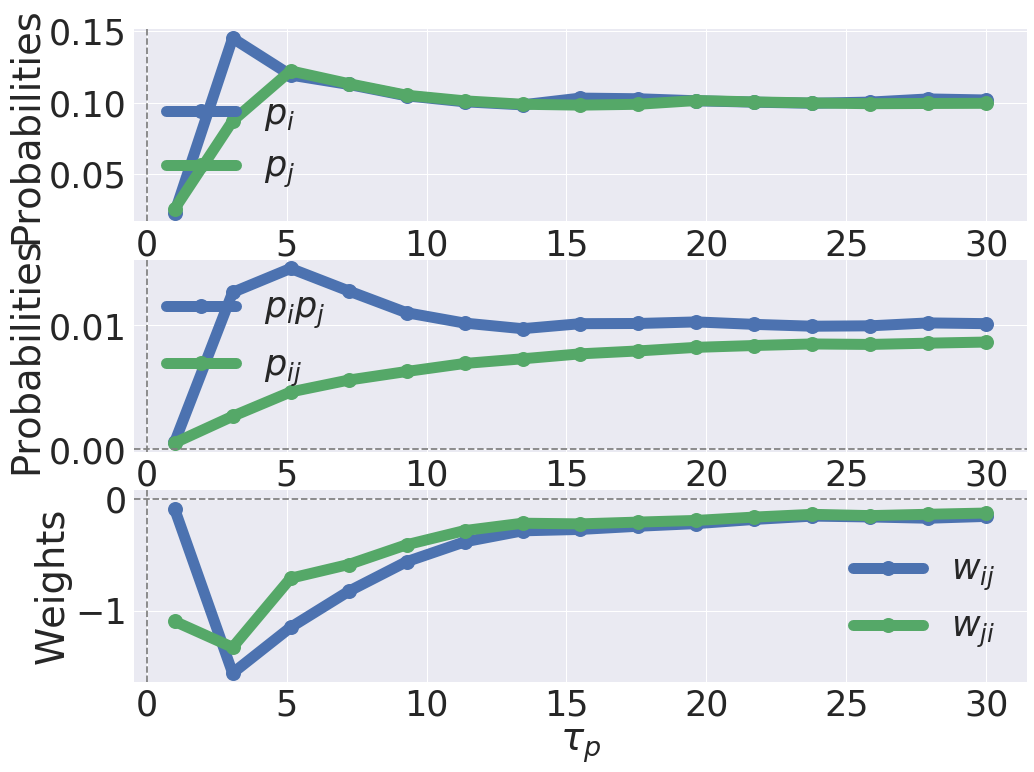

In [19]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(tau_p_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(tau_p_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(tau_p_vector, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(tau_p_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(tau_p_vector, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(tau_p_vector,  w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'$\tau_p$')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

## Rest

#### tau_z variations

In [20]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 8
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

tau_z_pre_vector = np.linspace(0.005, 0.250, num=20)

for tau_z_pre_ in tau_z_pre_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_, tau_z_post_ampa=tau_z_pre_, tau_p=tau_p, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 11.9 s, sys: 12 ms, total: 11.9 s
Wall time: 11.9 s


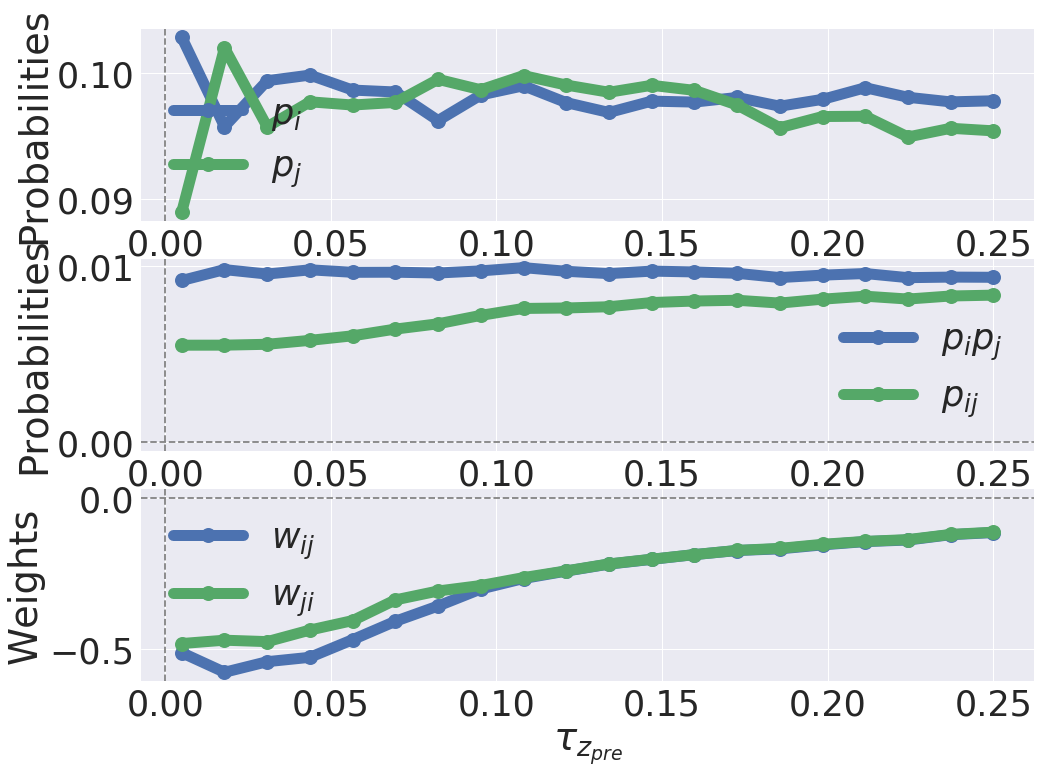

In [21]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(tau_z_pre_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(tau_z_pre_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(tau_z_pre_vector, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(tau_z_pre_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(tau_z_pre_vector, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(tau_z_pre_vector, w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'$\tau_{z_{pre}}$')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

#### Training time variations

In [22]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 8
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

training_times = np.arange(0.050, 3.050, 0.150)
# training_times = np.linspace(0.010, 1.0, num=10)
# training_times = np.linspace(0.010, 1.0, num=10)

for training_time in training_times:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 1min 51s, sys: 340 ms, total: 1min 52s
Wall time: 1min 51s


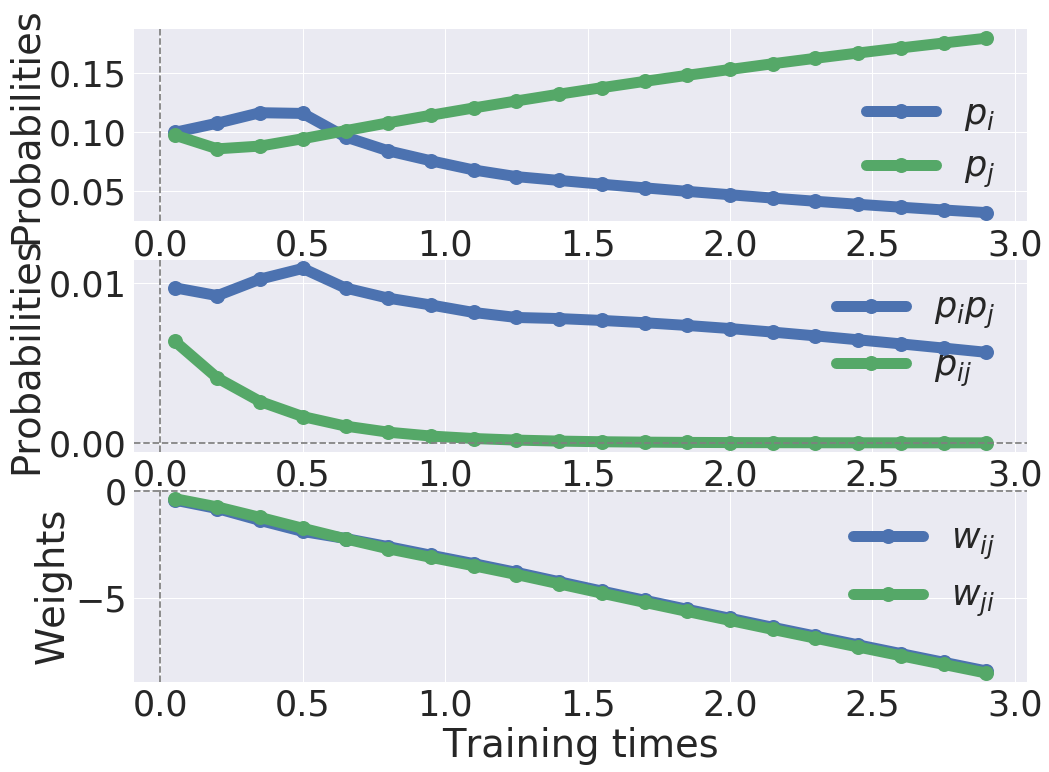

In [23]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(training_times, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(training_times, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(training_times, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(training_times, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(training_times, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(training_times, w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'Training times')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();

#### Tau_p variations

In [24]:
%%time 
always_learning = False
k_perfect = True
z_transfer = False
perfect = False
strict_maximum = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o']

# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
resting_time = inter_sequence_interval
epochs = 3

from_pattern = 2
to_pattern = 8
pi_vector = []
pj_vector = []
pij_vector = []
w_vector1 = []
w_vector2 = []

tau_p_vector = np.linspace(1.0, 30, num=15)

for tau_p_ in tau_p_vector:
    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                      tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p_, z_transfer=z_transfer, tau_m=tau_m,
                      diagonal_zero=False, strict_maximum=strict_maximum, perfect=perfect, k_perfect=k_perfect,
                      always_learning=always_learning)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    pi = np.copy(nn.p_pre_ampa[from_pattern])
    pj = np.copy(np.copy(nn.p_post_ampa[to_pattern]))
    pji = np.copy(nn.p_co_ampa[from_pattern, to_pattern])
    pij = np.copy(nn.p_co_ampa[to_pattern, from_pattern])
    
    pi_vector.append(pi)
    pj_vector.append(pj)
    pij_vector.append(pij)
    w_vector1.append(np.log(pij / (pi * pj)))
    w_vector2.append(nn.w_ampa[to_pattern, from_pattern])

CPU times: user 8.88 s, sys: 8 ms, total: 8.89 s
Wall time: 8.89 s


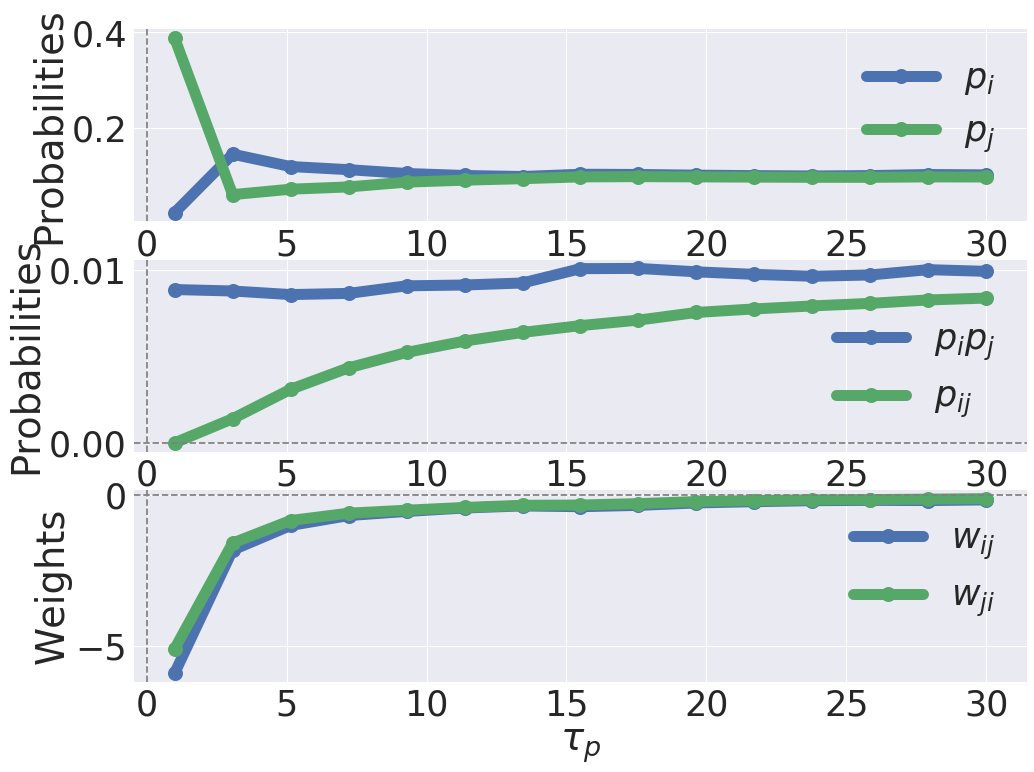

In [25]:
markersize = 15
linewidth = 11

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(tau_p_vector, pi_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i$')
ax1.plot(tau_p_vector, pj_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_j$')

ax1.set_ylabel('Probabilities')

# ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

# The co-activations
multipy  = [pi * pj for (pi, pj) in zip(pi_vector, pj_vector)] 
ax2.plot(tau_p_vector, multipy, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_i p_j$')
ax2.plot(tau_p_vector, pij_vector, 'o-', markersize=markersize, linewidth=linewidth, label=r'$p_{ij}$')
ax2.set_ylabel('Probabilities')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

# The weights
ax3.plot(tau_p_vector, w_vector1, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ij}$')
ax3.plot(tau_p_vector,  w_vector2, 'o-', markersize=markersize, linewidth=linewidth, label=r'$w_{ji}$')

ax3.set_xlabel(r'$\tau_p$')
ax3.set_ylabel('Weights')

ax3.axhline(0, ls='--', color='gray')
ax3.axvline(0, ls='--', color='gray')

# fig.tight_layout()

ax1.legend()
ax2.legend()
ax3.legend();